In [3]:
import math 
import pandas_datareader as web
import pandas_datareader.data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from keras import Sequential
from sklearn.model_selection import train_test_split

In [15]:
import yfinance as yf
import pandas_datareader.data as pdr
from datetime import datetime as dt

yf.pdr_override()

start_date = '01-01-2010'
end_date = '03-07-2021'

start = dt.strptime(start_date, '%d-%m-%Y')
end = dt.strptime(end_date, '%d-%m-%Y')
df = pdr.get_data_yahoo('TSLA', data_source='yahoo', start=start, end=end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2021-06-28,671.640015,694.700012,670.320007,688.719971,688.719971,21628200
2021-06-29,684.650024,687.510010,675.890015,680.760010,680.760010,17381300
2021-06-30,679.770020,692.809998,678.140015,679.700012,679.700012,18924900


In [5]:
df=webr.DataReader(name='ORCL',data_source='yahoo',start='2010-01-01',end='2021-07-04')
df

NameError: name 'webr' is not defined

In [20]:
yf.pdr_override()

start_date = '01-01-2010'
end_date = '03-07-2021'

start = dt.strptime(start_date, '%d-%m-%Y')
end = dt.strptime(end_date, '%d-%m-%Y')
data = pdr.get_data_yahoo('AMZN', data_source='yahoo', start=start, end=end)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,137.089996,137.279999,134.520004,134.520004,134.520004,4523000
2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
...,...,...,...,...,...,...
2021-06-28,3416.000000,3448.000000,3413.510010,3443.889893,3443.889893,2242800
2021-06-29,3438.820068,3456.030029,3423.030029,3448.139893,3448.139893,2098400
2021-06-30,3441.060059,3471.600098,3435.000000,3440.159912,3440.159912,2404000


In [17]:
df1=df.reset_index(level=0)
df1.shape

(2773, 7)

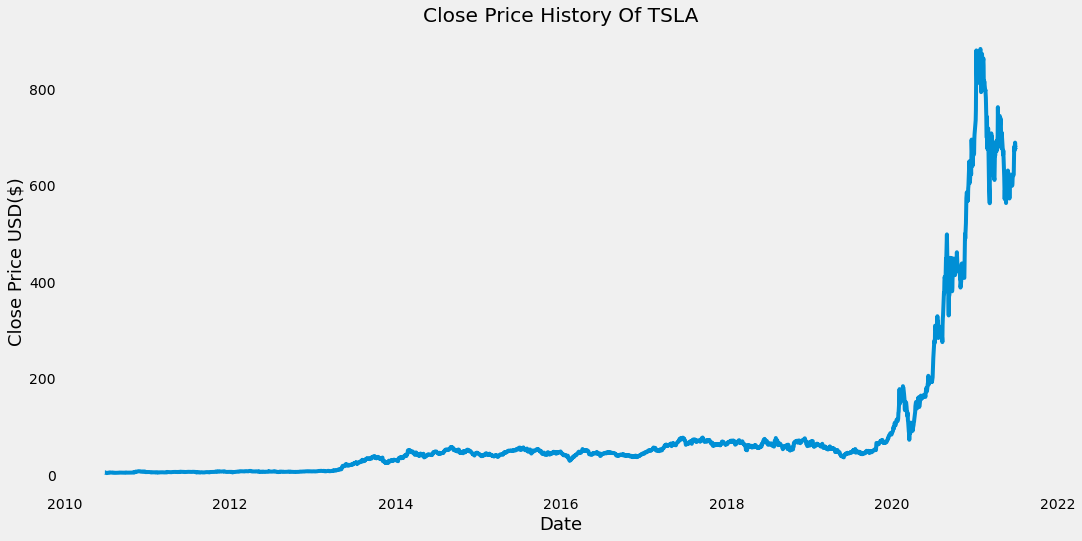

In [22]:
plt.figure(figsize=(16,8))
plt.title('Close Price History Of TSLA')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.grid(False)

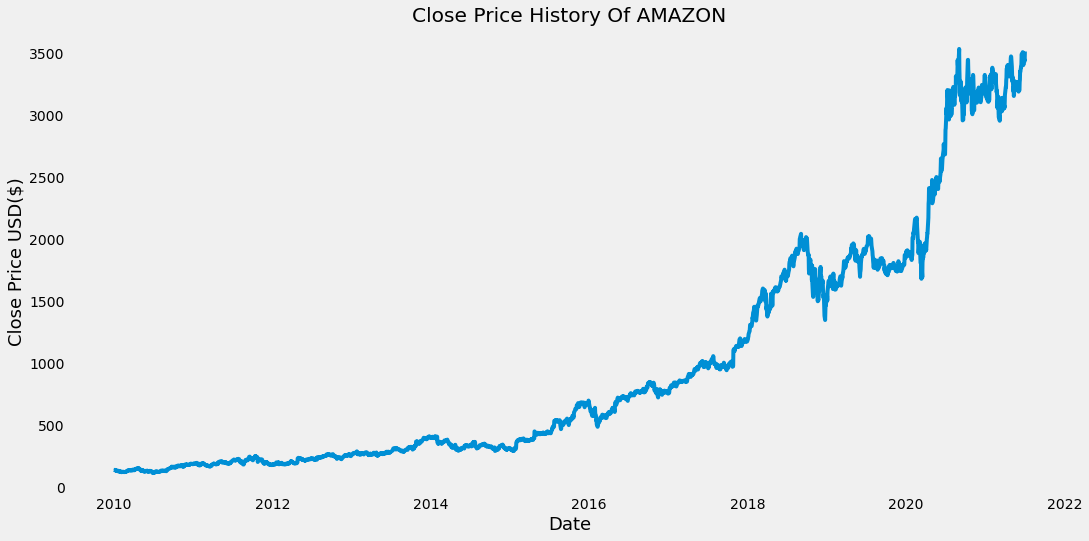

In [21]:
plt.figure(figsize=(16,8))
plt.title('Close Price History Of AMAZON')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.grid(False)

In [23]:
df2=df.filter(['Close'])
values=data.values
training_data_len=math.ceil(len(values)*0.8)
training_data_len

2317

In [24]:
values

array([[1.37089996e+02, 1.37279999e+02, 1.34520004e+02, 1.34520004e+02,
        1.34520004e+02, 4.52300000e+06],
       [1.36250000e+02, 1.36610001e+02, 1.33139999e+02, 1.33899994e+02,
        1.33899994e+02, 7.59990000e+06],
       [1.33429993e+02, 1.35479996e+02, 1.31809998e+02, 1.34690002e+02,
        1.34690002e+02, 8.85190000e+06],
       ...,
       [3.44106006e+03, 3.47160010e+03, 3.43500000e+03, 3.44015991e+03,
        3.44015991e+03, 2.40400000e+06],
       [3.43461011e+03, 3.45700000e+03, 3.40941992e+03, 3.43296997e+03,
        3.43296997e+03, 2.03710000e+06],
       [3.45163989e+03, 3.51171997e+03, 3.43691992e+03, 3.51097998e+03,
        3.51097998e+03, 3.16940000e+06]])

In [25]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(values)
scaled_data

array([[0.00905532, 0.00754928, 0.00849481, 0.00756974, 0.00756974,
        0.08766773],
       [0.00881121, 0.00735467, 0.00808663, 0.0073886 , 0.0073886 ,
        0.16173886],
       [0.0079917 , 0.00702644, 0.00769324, 0.0076194 , 0.0076194 ,
        0.19187863],
       ...,
       [0.96921308, 0.9760654 , 0.98471114, 0.97332915, 0.97332915,
        0.03665641],
       [0.96733868, 0.97182452, 0.97714507, 0.97122858, 0.97122858,
        0.02782392],
       [0.97228766, 0.98771897, 0.98527902, 0.99401959, 0.99401959,
        0.05508211]])

In [26]:
train_data=scaled_data[0:training_data_len]
len(train_data)

2317

In [27]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [28]:
len(x_train),len(y_train)

(2257, 2257)

In [29]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train.shape,y_train.shape

((2257, 60, 1), (2257,))

In [35]:
model=Sequential()
model.add(LSTM((500),input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(250))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))
model.compile(loss="mean_absolute_error",optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=5,validation_data=(x_train,y_train))

Epoch 1/5
71/71 [==============================] - 76s 1s/step - loss: 0.0270 - accuracy: 4.4307e-04 - val_loss: 0.0068 - val_accuracy: 4.4307e-04
Epoch 2/5
71/71 [==============================] - 74s 1s/step - loss: 0.0166 - accuracy: 4.4307e-04 - val_loss: 0.0095 - val_accuracy: 4.4307e-04
Epoch 3/5
71/71 [==============================] - 74s 1s/step - loss: 0.0157 - accuracy: 4.4307e-04 - val_loss: 0.0069 - val_accuracy: 4.4307e-04
Epoch 4/5
71/71 [==============================] - 74s 1s/step - loss: 0.0163 - accuracy: 4.4307e-04 - val_loss: 0.0130 - val_accuracy: 4.4307e-04
Epoch 5/5
71/71 [==============================] - 73s 1s/step - loss: 0.0156 - accuracy: 4.4307e-04 - val_loss: 0.0090 - val_accuracy: 4.4307e-04


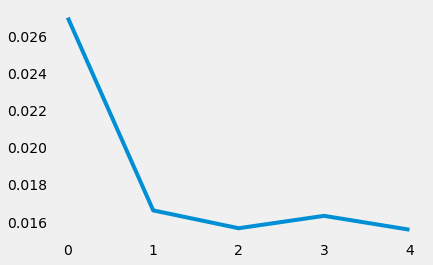

In [37]:
plt.plot(history.history['loss'])
plt.grid(False)
plt.show()

In [38]:
model.evaluate(x_train,y_train)

71/71 [==============================] - 22s 310ms/step - loss: 0.0090 - accuracy: 4.4307e-04


[0.008965140208601952, 0.0004430660046637058]

# New Dataset

In [39]:
df1=pd.read_csv(r"C:\Mba notes\novels\NLP data\Time series Price Prediction\raw_sales.csv")
df1.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [40]:
price=df1['price']
df1.drop('price',1,inplace=True)
df1['price']=price
df1.head()

<ipython-input-40-5c054e5d3aba>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop('price',1,inplace=True)


,datesold,postcode,propertyType,bedrooms,price
0,2007-02-07 00:00:00,2607,house,4,525000
1,2007-02-27 00:00:00,2906,house,3,290000
2,2007-03-07 00:00:00,2905,house,3,328000
3,2007-03-09 00:00:00,2905,house,4,380000
4,2007-03-21 00:00:00,2906,house,3,310000


In [41]:
df1["propertyType"].value_counts()

house    24552
unit      5028
Name: propertyType, dtype: int64

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   propertyType  29580 non-null  object
 3   bedrooms      29580 non-null  int64 
 4   price         29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [43]:
df1['datesold']=pd.to_datetime(df1['datesold'])
df1.head()

,datesold,postcode,propertyType,bedrooms,price
0,2007-02-07,2607,house,4,525000
1,2007-02-27,2906,house,3,290000
2,2007-03-07,2905,house,3,328000
3,2007-03-09,2905,house,4,380000
4,2007-03-21,2906,house,3,310000


In [44]:
L=LabelEncoder()
df1['propertyType']=L.fit_transform(df1['propertyType'])
df1.head()

,datesold,postcode,propertyType,bedrooms,price
0,2007-02-07,2607,0,4,525000
1,2007-02-27,2906,0,3,290000
2,2007-03-07,2905,0,3,328000
3,2007-03-09,2905,0,4,380000
4,2007-03-21,2906,0,3,310000


In [45]:
len(df1)

29580

In [58]:
x_train,x_test,y_train,y_test=train_test_split(df1.drop(['datesold','price'],1),df1['price'],test_size=0.8,random_state=43)

<ipython-input-58-a4578d3e4f17>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_train,x_test,y_train,y_test=train_test_split(df1.drop(['datesold','price'],1),df1['price'],test_size=0.8,random_state=43)


In [60]:
x_train=np.array(x_train)
x_train=x_train.reshape(-1,3,1)

In [62]:
x_train.shape

(5916, 3, 1)

In [63]:
model=Sequential()
model.add(LSTM((200),input_shape=(x_train.shape[1:]),return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80))
model.add(Dropout(0.3))
model.add(Dense(50))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Dense(1))
model.compile(loss="mean_absolute_error",optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_train,y_train))


Epoch 1/20
185/185 [==============================] - 6s 30ms/step - loss: 607828.8750 - accuracy: 0.0000e+00 - val_loss: 604735.5000 - val_accuracy: 0.0000e+00
Epoch 2/20
185/185 [==============================] - 3s 17ms/step - loss: 593580.3750 - accuracy: 0.0000e+00 - val_loss: 575927.8750 - val_accuracy: 0.0000e+00
Epoch 3/20
185/185 [==============================] - 3s 17ms/step - loss: 542182.3125 - accuracy: 0.0000e+00 - val_loss: 498383.8750 - val_accuracy: 0.0000e+00
Epoch 4/20
185/185 [==============================] - 3s 17ms/step - loss: 433016.2500 - accuracy: 0.0000e+00 - val_loss: 354514.5312 - val_accuracy: 0.0000e+00
Epoch 5/20
185/185 [==============================] - 3s 17ms/step - loss: 272565.9062 - accuracy: 0.0000e+00 - val_loss: 202760.8281 - val_accuracy: 0.0000e+00
Epoch 6/20
185/185 [==============================] - 3s 17ms/step - loss: 193137.2812 - accuracy: 0.0000e+00 - val_loss: 179013.0938 - val_accuracy: 0.0000e+00
Epoch 7/20
185/185 [==============

In [64]:
model.evaluate(x_train,y_train)

185/185 [==============================] - 1s 4ms/step - loss: 177898.0781 - accuracy: 0.0000e+00


[177898.078125, 0.0]

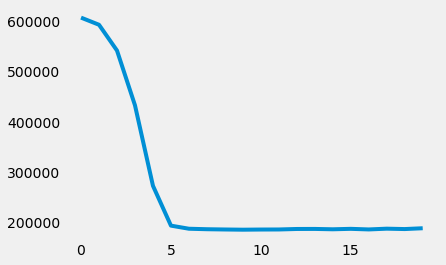

In [65]:
plt.plot(history.history['loss'])
plt.grid(False)
plt.show()